In [5505]:
#importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt


#import the warnings.
import warnings
warnings.filterwarnings('ignore')

# 1.Understading the provided data

**1.1 Import and read the data**

In [5506]:
#read the data of "day" from day.csv.
day_data = pd.read_csv("/kaggle/input/daycsv/day.csv")
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


**1.2 get some initial information on data**

In [5507]:
# lenth of data
len(day_data)


730

In [5508]:
#shape of data
day_data.shape

(730, 16)

In [5509]:
# gain insights of day data
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5510]:
#Get day data information 
day_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# 2. Data Cleaning

**2.1 Remove missing values from columns**

In [5511]:
#checking for null values column wise
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Inference:**

**It has been oberved that there is no null values in data**

In [5512]:
#all columns   
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5513]:
#dropping useless columns
day_data = day_data.drop(["instant"], axis = 1)
day_data = day_data.drop(['registered'] , axis = 1)
day_data = day_data.drop(['casual'] , axis = 1)

In [5514]:
#shape of day data after dropping useless columns 
day_data.shape

(730, 13)

In [5515]:
# Check the head of the dataset
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Changing Dteday Column To Date Data type**

In [5516]:
#converts the values in the "dteday" column from the DataFrame "day_data" to datetime format
day_data["dteday"] = pd.to_datetime(day_data["dteday"]) 

In [5517]:
#retrieves the data type of its values.
day_data["dteday"].dtype

dtype('<M8[ns]')

In [5518]:
#return an array of unique year values present in the "dteday" column
day_data["dteday"].dt.year.unique()

array([2018, 2019])

**2.2 Mapping with catgorical columns**

In [5519]:
# mapping the season column
day_data["season"].unique()
season = {1:'spring', 
          2:'summer', 
          3:'fall', 
          4:'winter'}
day_data["season"] = day_data["season"].map(season)
day_data.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [5520]:
#mapping the weekday column
yr = {0: 2018, 1: 2019}

In [5521]:
day_data["yr"] = day_data["yr"].map(yr)
day_data["yr"].unique()

array([2018, 2019])

In [5522]:
#shape of data 
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5523]:
#mapping the month column
day_data["mnth"].unique()
month = {1 : "Jan" , 2 : "Feb", 3 : "Mar" , 4 : " Apr" , 5 : "May" , 6 : "Jun",
         7 : "Jul", 8 : "Aug" , 9 : "Sep" , 10 : "Oct" , 11 : "Nov" , 12 : "Dec"}
day_data["mnth"] = day_data["mnth"].map(month)
day_data["mnth"].unique()

array(['Jan', 'Feb', 'Mar', ' Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [5524]:
#mapping the weekday column
day_data["weekday"].unique()
day = {0 : "Sun" , 1 : "Mon" , 2 : "Tue" , 3 : "Wed" ,
      4 : "Thu" , 5 : "Fri", 6 : "Sat"}
day_data["weekday"] = day_data["weekday"].map(day)
day_data["weekday"].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [5525]:
#mapping the weathersit column
day_data["weathersit"].unique()
weather = {1 : "Clear",
          2 : "Cloudy",
          3 : "Light Rain"}
day_data["weathersit"] = day_data["weathersit"].map(weather)
day_data["weathersit"].unique()

array(['Cloudy', 'Clear', 'Light Rain'], dtype=object)

In [5526]:
# check the head of the day data
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [5527]:
#check duplicacy 
day_data.duplicated().sum()

0

In [5528]:
# day data info
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 74.3+ KB


# 3. Exploratory Data Analysis

# **3.1 Univariate Analysis**

**3.1.1 Year Column**

In [5529]:
year_count = day_data.groupby("yr")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
year_count


,yr,cnt
1,2019,2047742
0,2018,1243103


<Figure size 600x400 with 0 Axes>

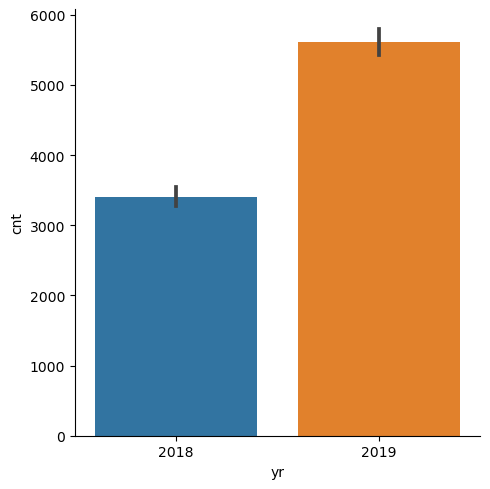

In [5530]:
#plotting visualization
plt.figure(figsize = (6,4) , dpi = 100)

# Check if 'yr' is a valid column name
if 'yr' in day_data.columns:
    # Create a categorical plot using 'yr'
    sns.catplot(data=day_data, x='yr', y='cnt', kind='bar')
else:
    print("'yr' is not a valid column in the DataFrame.")

**percentage change between two values, 2018 and 2019**

In [5531]:
np.round(100 * ( year_count["cnt"][1] - year_count["cnt"][0] ) / year_count["cnt"][0] , 2)

64.73

**Inference:**

**From above obervation, we can say that number of bikes rented in 2019 increased by 65% compared to the year 2018, which is a positive sign for any business on a year-over-year basis**

**3.1.2 Weekday Column**

In [5532]:
weekday_count = day_data.groupby("weekday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
weekday_count

,weekday,cnt
0,Fri,487790
4,Thu,485395
2,Sat,477807
6,Wed,471214
5,Tue,469109
1,Mon,455503
3,Sun,444027


<Figure size 800x400 with 0 Axes>

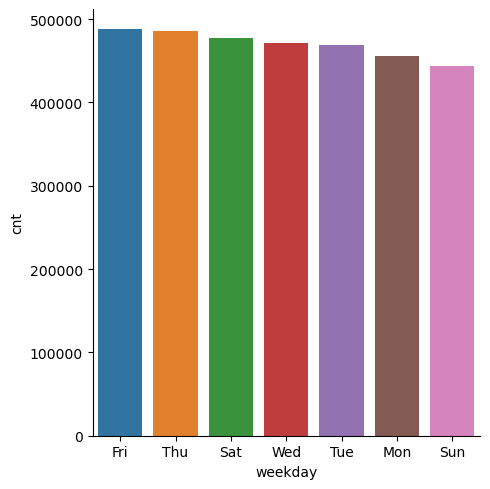

In [5533]:
#plotting visualization
plt.figure(figsize = (8,4) , dpi = 100)

sns.catplot(data = weekday_count, x = "weekday" , y = "cnt", kind='bar');

**Inference:**

**From the preceding visualization and observation we can say that the highest bike rented on Friday.**

**3.1.3 Workday Column**

In [5534]:
# calculates the total count of of bike rentals on working days and non working days
workday_count = day_data.groupby("workingday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
workday_count

,workingday,cnt
1,1,2290576
0,0,1000269


<Figure size 600x400 with 0 Axes>

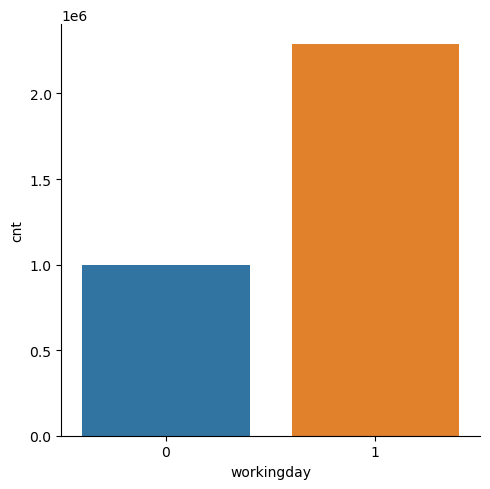

In [5535]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.catplot(data = workday_count, x = "workingday" , y = "cnt", kind='bar');

**Inference:**

**From above obervation we can say that, most bikes were rented on working days. This indicates that a significant number of people are likely renting bikes for their daily commutes to their workplaces. As a result, the bike rental company, BoomBikes, generates the majority of its business (more than twice as much) on workdays rather than holidays or weekend.**

**3.1.4 Weathersit Column**

In [5536]:
weathersit_count = day_data.groupby("weathersit")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
weathersit_count

,weathersit,cnt
0,Clear,2257952
1,Cloudy,995024
2,Light Rain,37869


<Figure size 600x400 with 0 Axes>

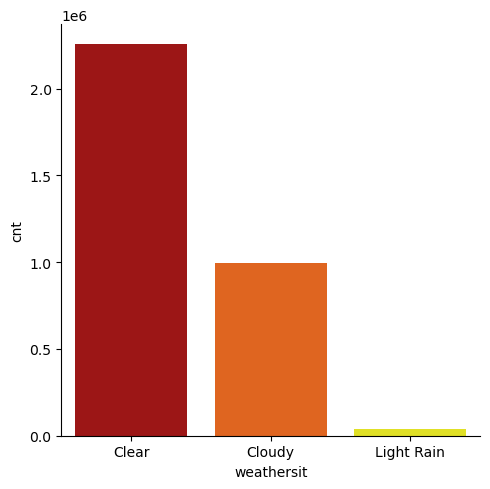

In [5537]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.catplot(data = weathersit_count, x = "weathersit" , y = "cnt", kind='bar', palette = "hot");

**Inference:**

**From the preceding visualization and observation, it's evident that weather conditions play a significant role in the bike rental business. The number of bikes rented during rainy weather is notably lower compared to when the weather is clear**

**3.1.5 Month Column**

In [5538]:
month_count = day_data.groupby("mnth")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
month_count

,mnth,cnt
1,Aug,351194
6,Jun,346342
11,Sep,345991
5,Jul,344948
8,May,331686
10,Oct,322352
0,Apr,269094
9,Nov,254831
7,Mar,228920
2,Dec,211036


<Figure size 1000x400 with 0 Axes>

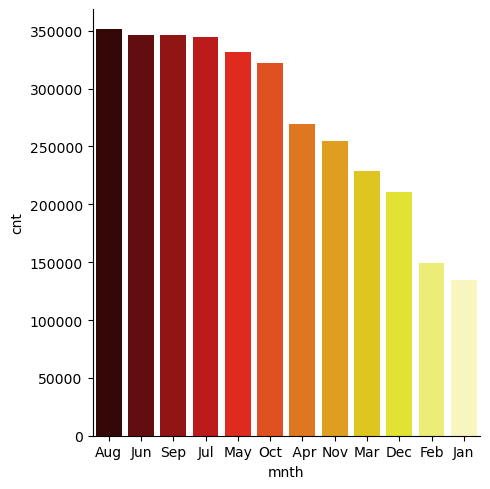

In [5539]:
plt.figure(figsize = (10,4) , dpi = 100)
sns.catplot(data = month_count, x = "mnth" , y = "cnt", kind = "bar", palette = "hot" );

**Inference:**

**From the preceding visualization and observation we can say that the highest bike rentals occurred during August and June**

# **3.2 Bivariate Analysis**

Bivariate analysis involves examining the relationship between two variables related here with bike sharing data

**3.2.1 Season Vs Windspeed**

In [5540]:
season_avg_wind = day_data.groupby("season")["windspeed"].mean().reset_index().sort_values(by = "windspeed" , ascending = False)
season_avg_wind

,season,windspeed
1,spring,14.387168
2,summer,13.634978
0,fall,11.530366
3,winter,11.523637


<Figure size 800x400 with 0 Axes>

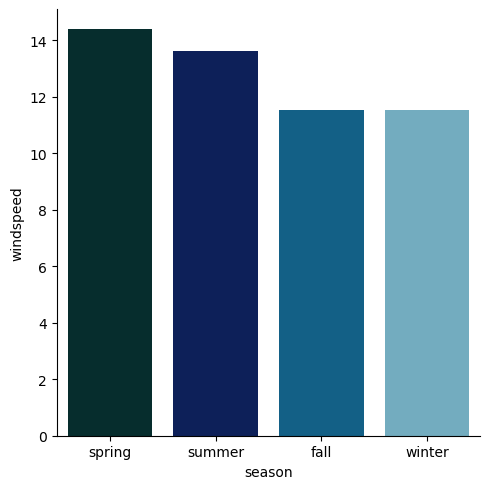

In [5541]:
plt.figure(figsize = (8,4) , dpi = 100)
sns.catplot(data = season_avg_wind, x = "season" , y = "windspeed", kind = "bar", palette = "ocean" );

**Based on the bar plots above, it is evident that bike rentals were more frequent during the fall season and relatively lower during spring. Upon analyzing the climatic conditions, one plausible explanation for this trend could be the significantly lower average temperature and higher average wind speed during spring compared to the fall**

**3.2.2 Season Vs Temperature**

In [5542]:
season_count = day_data.groupby("season")["cnt"].sum().reset_index()
season_count

,season,cnt
0,fall,1061129
1,spring,469514
2,summer,918589
3,winter,841613


<Figure size 800x400 with 0 Axes>

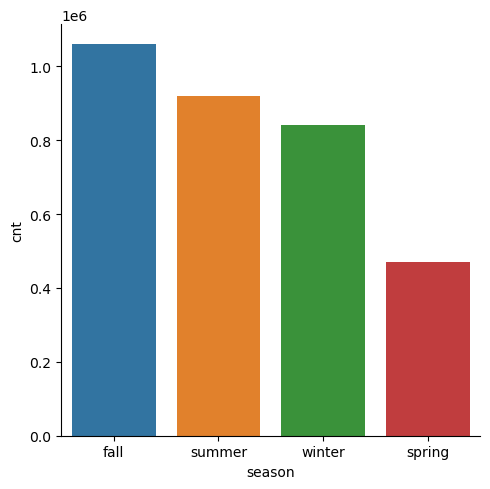

In [5543]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.catplot(data = season_count.sort_values(by = "cnt" , ascending = False), x = "season" , y = "cnt", kind = "bar");

In [5544]:
season_avg_temp = day_data.groupby("season")["temp"].mean().reset_index().sort_values(by = "temp" , ascending = False)
season_avg_temp

,season,temp
0,fall,28.958682
2,summer,22.320611
3,winter,17.339148
1,spring,12.197035


<Figure size 800x400 with 0 Axes>

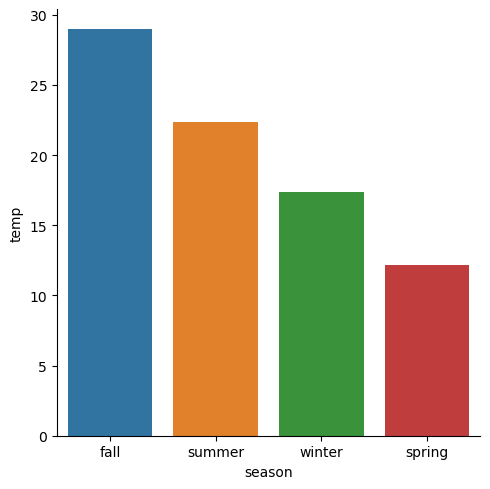

In [5545]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.catplot(data = season_avg_temp, x = "season" , y = "temp", kind = "bar");

**Inference:**

**Based on the bar plots above, it is evident that bike rentals were more frequent during the fall season and relatively lower during spring**

**3.2.3 Weekdays Vs Holidays**

In [5546]:
workday_count = day_data.groupby("workingday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
workday_count

,workingday,cnt
1,1,2290576
0,0,1000269


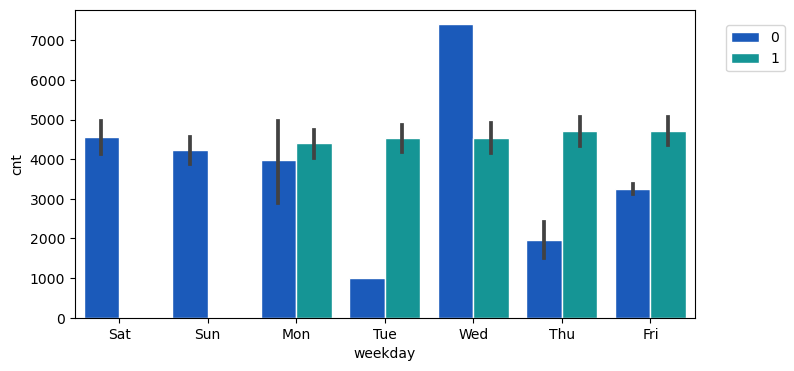

In [5547]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = day_data, x = "weekday" , y = "cnt", edgecolor = "white", palette = "winter", hue = "workingday")
plt.legend(loc = (1.05, 0.8));

***Inference:***

**On weekends, which are non-working days, the bike rental count is notably lower compared to other days. However, an intriguing pattern emerges: when Wednesday transitions from a working day to a holiday or non-working day, there is a significant increase in the number of rented bikes compared to Wednesdays that are regular working days**

In [5548]:
#head of data
day_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [5549]:
#check shape of data after dropping dteday column 
day_data.shape


(730, 13)

**drop dteady column**

In [5550]:
day_data = day_data.drop(["dteday"] , axis = 1)
day_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Thu,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,0,Fri,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,0,Sat,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [5551]:
#take day data copy
copy_day_data = pd.get_dummies(day_data, drop_first= True)
copy_day_data.shape

(730, 30)

# 4. Model Building

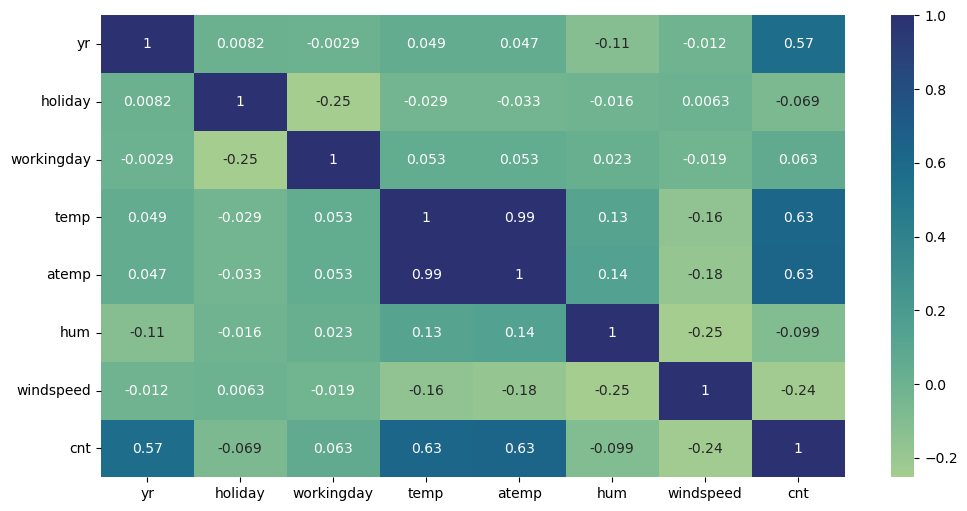

In [5552]:
#Correlations for variables
plt.figure(figsize = (12,6) , dpi = 100)

sns.heatmap(day_data.corr() , annot= True , cmap = "crest");

**Inference:**

**The 'temp' and 'atemp' columns exhibit a strong correlation, suggesting that one of these should be omitted during the feature selection process****

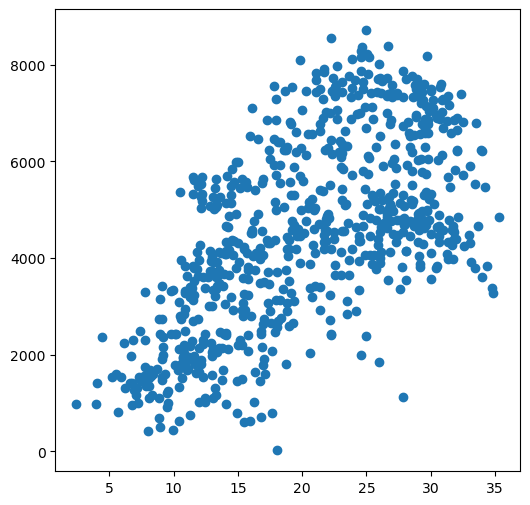

In [5553]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(day_data.temp, day_data.cnt)
plt.show()

***Inference:***

**Visualization confirms the positive correlation between temp and cnt.**

**4.1 Splitting the Data into Training and Testing Sets**

In [5554]:
from sklearn.model_selection import train_test_split
X = copy_day_data.drop("cnt", axis = 1)
Y = copy_day_data["cnt"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [5555]:
#shape of X_train
X_train.shape

(584, 29)

In [5556]:
#shape of X_test
X_test.shape

(146, 29)

**4.2. Standarising(scaling) the day data**

In [5557]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

**4.3. ML Models**:

**4.3.1 - First Model: This model is created without any feature selection**

In [5558]:
from sklearn.linear_model import LinearRegression
firstModel = LinearRegression()
firstModel.fit(scaled_X_train , Y_train)
LinearRegression()
y_pred1 = firstModel.predict(scaled_X_test)

#calculate the R-squared (coefficient of determination) score for a regression model
from sklearn.metrics import r2_score
np.round( 100 * r2_score(Y_test , y_pred1) , 2 )

84.19

**Inference:**

**Without performing any feature selection and without excluding any features, our firstModel achieves an R-squared score of 84.17%**

**4.3.2 - Second Model: This model is created with feature Selection using p-value method**

**Feature Selection using p-value method**

So, following are our null and alternate hypothesis

H0 = When perticular feature is not Significant for the model.

Ha = When perticular feature is Significant for the model.

**In our analysis, we will employ the statsmodels library to examine the p-values associated with each independent variable. Our chosen confidence interval is set at 95%, implying an alpha value of 0.05, which represents the probability of error. To proceed with including a feature in the model, its p-value must be less than 0.05, enabling us to reject the null hypothesis. Hence, a feature is deemed significant for our model when its p-value is below alpha, i.e., 0.05.**



In [5559]:
import statsmodels.api as sm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_variables = ['yr','temp', 'atemp', 'hum', 'windspeed']
X_train[num_variables] = scaler.fit_transform(X_train[num_variables])
X_test[num_variables] = scaler.transform(X_test[num_variables])
import statsmodels.api as sm
#add_constant
X_train_sm = sm.add_constant(X_train)
#OLS
lr = sm.OLS(Y_train , X_train_sm)
#fit
lr_model = lr.fit()
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.45e-206
Time:                        12:42:17   Log-Likelihood:                -4695.2
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     555   BIC:                             9575.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3687.6195    195.340     18.878      0.000    3303.924    4071.315
yr                     1018.0599     32.890     30.953      0.000     953.455    1082.664
holiday                 501.8766    181.428      2.766      0.006     145.508     858.246
workingday             1152.0671     87.504     13.166      0.000     980.188    1323.946
temp                     92.6493    484.977      0.191      0.849    -859.966    1045.265
atemp                   732.5112    464.139      1.578      0.115    -179.173    1644.195
hum                    -234.2472     48.466     -4.833      0.000    -329.446    -139.048
windspeed              -238.7256     37.547     -6.358      0.000    -312.478    -164.973
season_spring          -614.5953    243.191     -2.527      0.012   -1092.283    -136.908
season_summer           111.1189    203.711      0.545      0.586    -289.020     511.257
season_winter          1013.9418    224.039      4.526      0.000     573.874    1454.009
mnth_Aug                 80.2252    274.910      0.292      0.771    -459.766     620.216
mnth_Dec               -686.1167    277.534     -2.472      0.014   -1231.261    -140.972
mnth_Feb               -381.5942    265.363     -1.438      0.151    -902.832     139.644
mnth_Jan               -534.2944    275.237     -1.941      0.053   -1074.928       6.339
mnth_Jul               -299.6105    280.413     -1.068      0.286    -850.411     251.190
mnth_Jun                 61.7319    201.792      0.306      0.760    -334.638     458.102
mnth_Mar                 79.9474    209.165      0.382      0.702    -330.905     490.800
mnth_May                324.3726    171.833      1.888      0.060     -13.151     661.896
mnth_Nov               -762.0074    299.450     -2.545      0.011   -1350.201    -173.814
mnth_Oct               -156.7193    293.949     -0.533      0.594    -734.108     420.670
mnth_Sep                538.3037    259.873      2.071      0.039      27.849    1048.759
weekday_Mon            -217.7871    124.904     -1.744      0.082    -463.129      27.555
weekday_Sat            1212.7513     99.876     12.143      0.000    1016.570    1408.932
weekday_Sun             820.9245     99.548      8.247      0.000     625.388    1016.461
weekday_Thu             -14.5773    120.105     -0.121      0.903    -250.493     221.338
weekday_Tue            -114.0707    122.600     -0.930      0.353    -354.887     126.746
weekday_Wed             -65.8244    123.394     -0.533      0.594    -308.201     176.552
weathersit_Cloudy      -434.2741     89.120     -4.873      0.000    -609.327    -259.221
weathersit_Light Rain -1886.0735    236.834     -7.964      0.000   -2351.273   -1420.874
==============================================================================
Omnibus:                      111.

In [5560]:
X_train = X_train.drop("weekday_Wed" , axis = 1)
X_test = X_test.drop("weekday_Wed" , axis = 1)
model2 = LinearRegression()
model2.fit(X_train , Y_train)
LinearRegression()
y_pred2 = model2.predict(X_test)
r2_score(Y_test, y_pred2)

0.8415218284645699

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'weekday_Wed' column**


**4.3.3: Third Model**

In [5561]:
X_train = X_train.drop("temp", axis = 1)
X_test = X_test.drop("temp", axis = 1)
model2 = LinearRegression()
model2.fit(X_train , Y_train)
y_pred2 = model2.predict(X_test)
np.round(r2_score(Y_test, y_pred2),2)

0.84

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'temp' column.**

**4.3.4: Fourth Model**

In [5562]:
X_train = X_train.drop("mnth_Jul" , axis = 1)
X_test = X_test.drop("mnth_Jul" , axis = 1)
model2 = LinearRegression()
model2.fit(X_train , Y_train)
y_pred2 = model2.predict(X_test)
np.round(r2_score(Y_test, y_pred2),2)

0.8

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'mnth_Jul' column.**

**4.3.5: Fifth Model**

In [5563]:
X_train = X_train.drop("mnth_Sep" , axis = 1)
X_test = X_test.drop("mnth_Sep" , axis = 1)
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
np.round(r2_score(Y_test, y_pred),2)

0.83

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'mnth_Sep' column.**

**4.3.6: Sixth Model**

In [5564]:
X_train = X_train.drop("mnth_Mar" , axis = 1)
X_test = X_test.drop("mnth_Mar" , axis = 1)
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'mnth_Mar' column.**

**4.3.7: Seventh Model:**

In [5565]:
X_train = X_train.drop("mnth_Oct" , axis = 1)
X_test = X_test.drop("mnth_Oct" , axis = 1)
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

0.8305918158882849

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'mnth_Oct' column.**

**4.3.8: Eigth Model:**

In [5566]:
X_train = X_train.drop("weekday_Tue" , axis = 1)
X_test = X_test.drop("weekday_Tue" , axis = 1)
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

0.8300106054268552

**Inference:**

**We observe that our R-squared score remains unchanged even after removing the 'weekday_Tue' column.**

**4.3.9: Ninth Model:**

In [5567]:
X_train = X_train.drop("weathersit_Cloudy" , axis = 1)
X_test = X_test.drop("weathersit_Cloudy" , axis = 1)
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

0.8147996765629415

**Inference:**

**We observe that our R-squared score slighlty changed after removing the 'weathersit_Cloudy' column.****

**4.3.10: Tenth Model**

In [5568]:
X_train = X_train.drop("season_summer" , axis = 1)
X_test = X_test.drop("season_summer" , axis = 1)
model = LinearRegression()
model.fit(X_train , Y_train)
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

0.8142468773543816

**Inference:**

**We observe that our R-squared score slighlty changed after removing the 'season_summer' column.****

# 5. Evidence Supporting the Assumptions of Linear Regression

**5.1. Considering the Assumption of Normally Distributed Error Terms, our model cannot be considered final until we conduct residual analysis. This involves verifying whether the distribution of errors is centered around 0.**

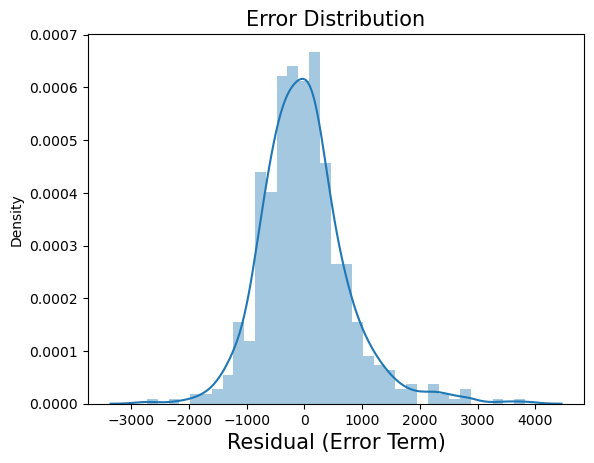

In [5569]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - Y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 15})
plt.show()

**Inference:**

**The graph above clearly shows that the distribution of errors is normal and centers around 0. This observation suggests that our model has effectively addressed the assumption of normal error distribution**

**5.2 Considering the Assumption of Independent Error Terms**

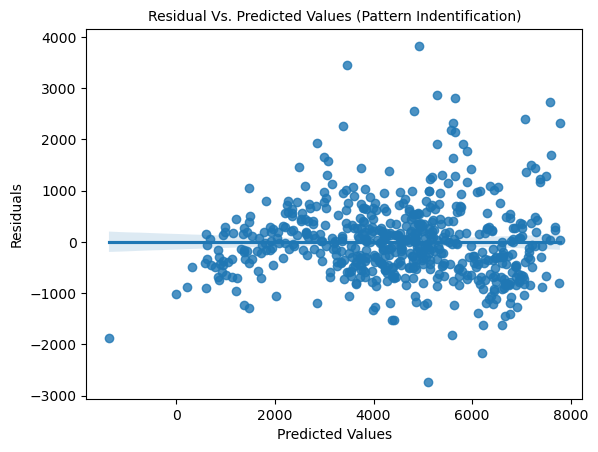

In [5570]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 10})
plt.xlabel('Predicted Values', fontdict={'fontsize': 10})
plt.ylabel('Residuals', fontdict={'fontsize': 10})
plt.show()

**Inference:**

**Observing the graph above, it becomes evident that there is minimal correlation between the Residual and Predicted Value. This outcome aligns with our model's expectation of exhibiting no distinct pattern.**

# Conclusion 

**Summary Observation Across All Models:**

**The initial structure of X_train included 29 columns, resulting in an achieved r2 score of approximately 84.17%. Despite this, through the creation of 12 distinct models, wherein various independent variables were omitted based on their P-values, the count of independent variables was streamlined to 18 out of the original 29. Astonishingly, even with this reduction, the resultant r2 score remained at 83.76%, mirroring the performance of the initial model with all 29 variables. This leads us to the conclusion that within the dataset, 18 significant variables hold predictive value for the target variable when employing multiple linear regression."
**
